In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [ ]:
from sklearn.linear_model import LinearRegression
car_df = pd.read_excel('car_data.xlsx')

In [ ]:
car_df.head(5).transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized_losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel_type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num_of_doors,two,two,two,four,four
body_style,convertible,convertible,hatchback,sedan,sedan
drive_wheels,rwd,rwd,rwd,fwd,4wd
engine_location,front,front,front,front,front
wheel_base,88.6,88.6,94.5,99.8,99.4


In [ ]:
#object types are string

car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

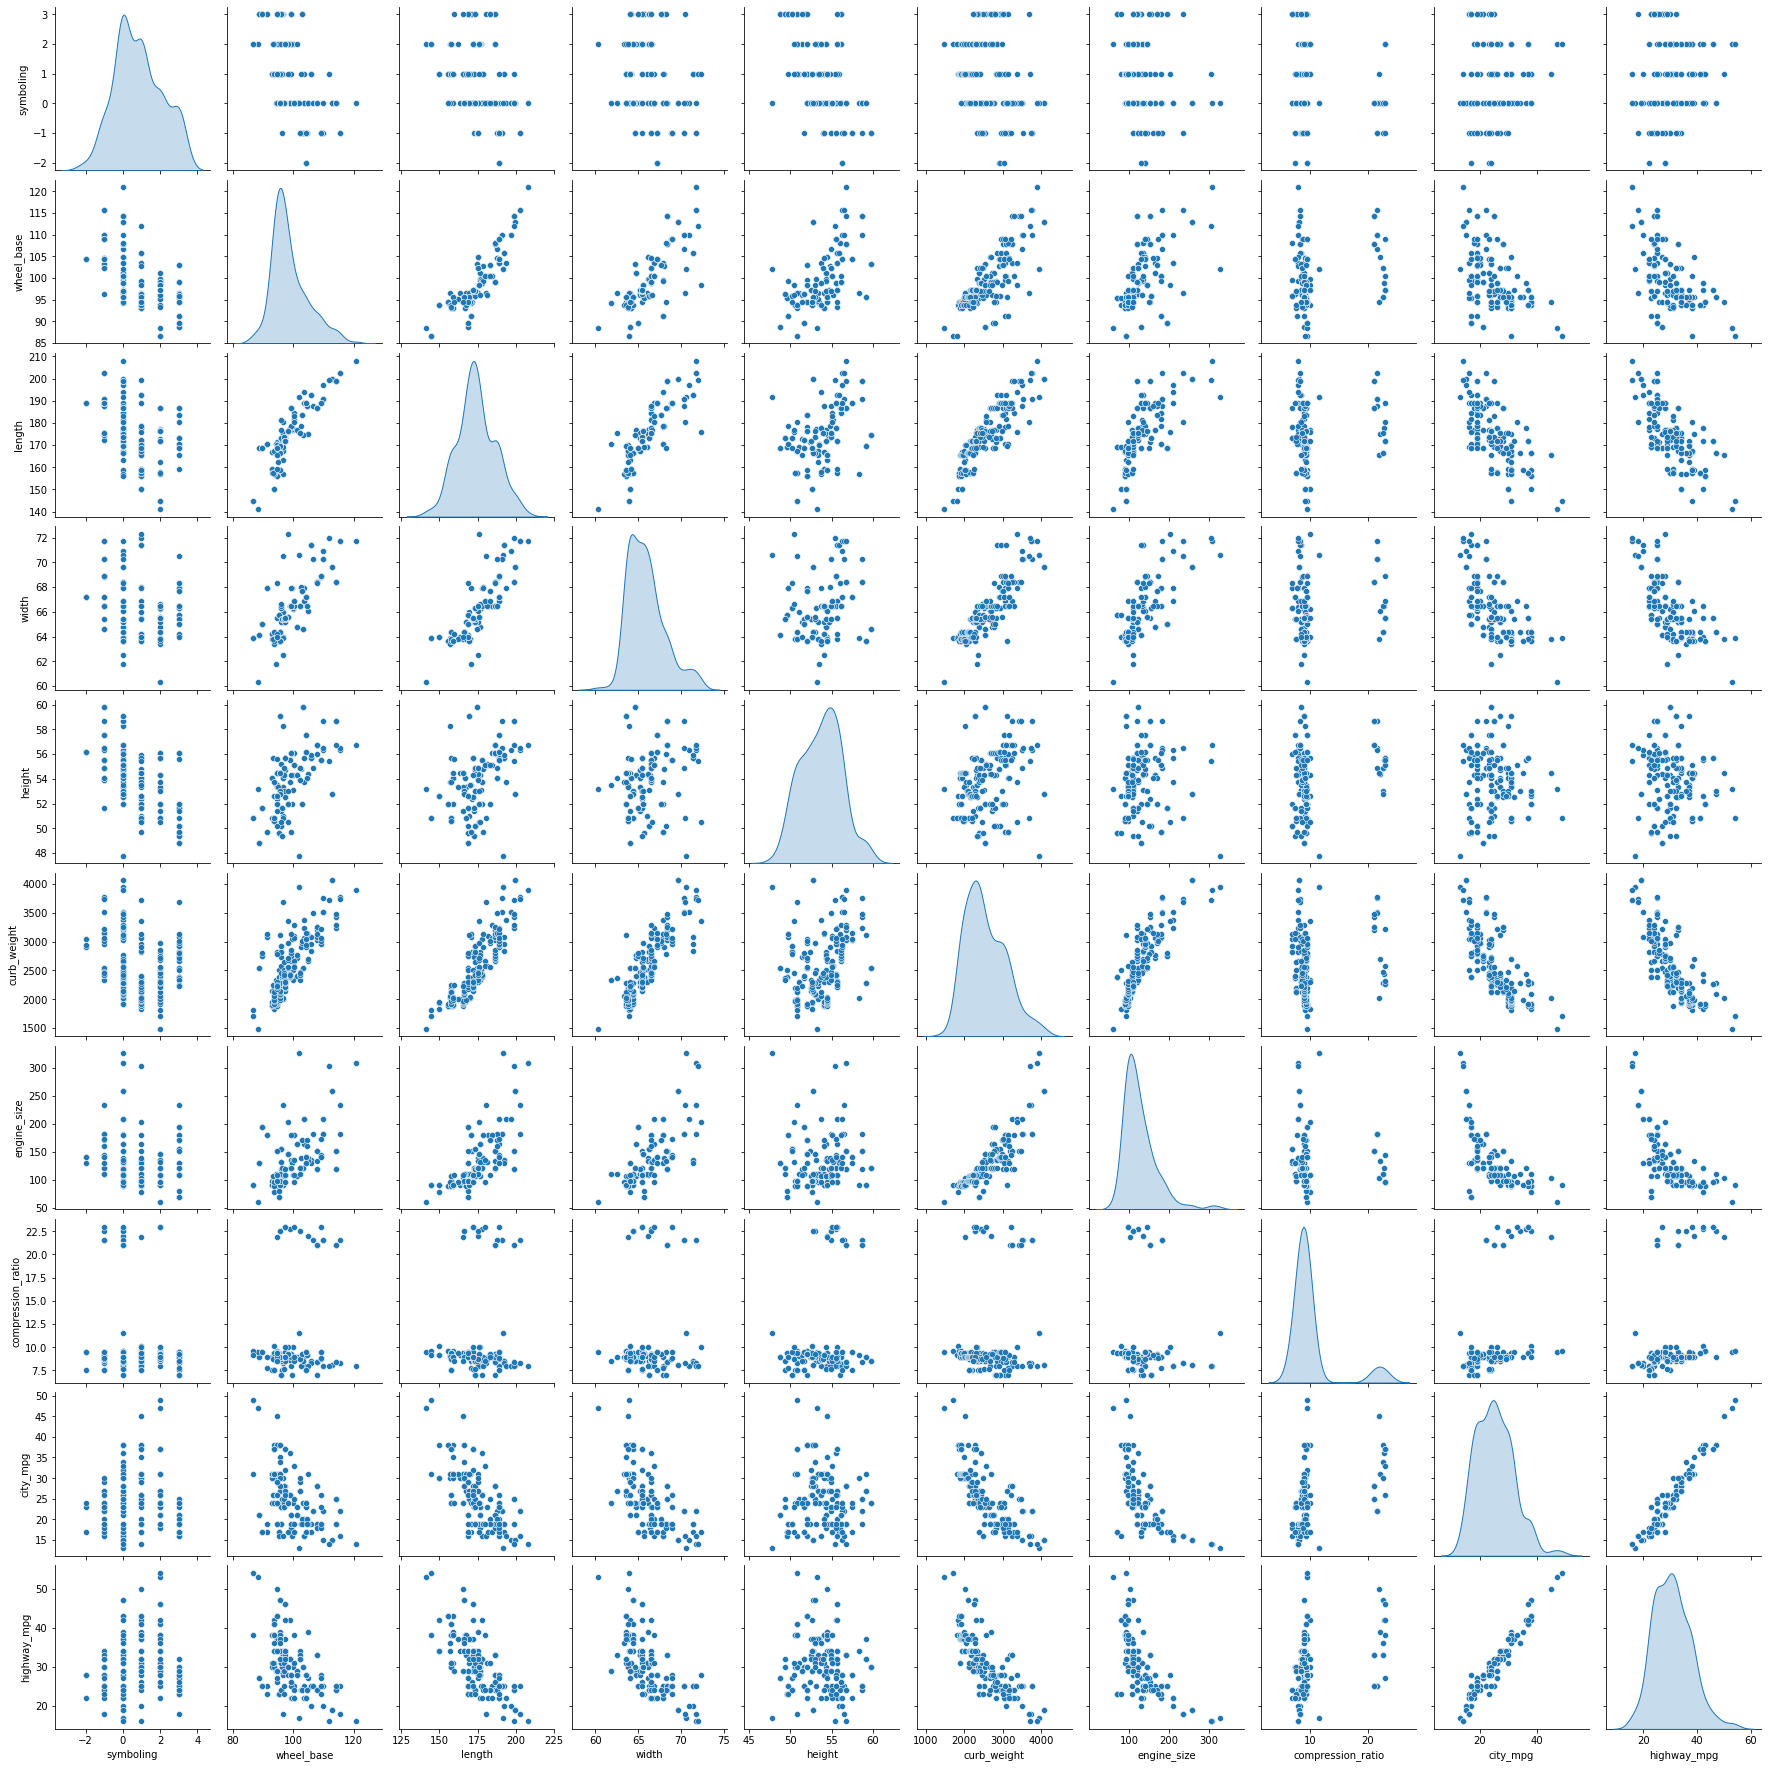

In [ ]:
sns.pairplot(car_df, diag_kind = 'kde')

In [ ]:
#drop low variance columns
#all columns that we are dropping are object type

car_df = car_df.drop('make', axis = 1)
car_df = car_df.drop('fuel_type', axis = 1)
car_df = car_df.drop('engine_location', axis = 1)
car_df = car_df.drop('num_of_doors', axis = 1)
car_df = car_df.drop('body_style', axis = 1)
car_df = car_df.drop('drive_wheels', axis = 1)
car_df = car_df.drop('engine_type', axis = 1)
car_df = car_df.drop('fuel_system', axis = 1)
car_df = car_df.drop('aspiration', axis = 1)
car_df = car_df.drop('normalized_losses', axis = 1)

In [ ]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [ ]:
car_df['num_of_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
#convert num_of_cylinders to numeric from object type
#since this value are ordinal we can try and replace
#if the values are not ordinal we can use one hot encode

car_df['num_of_cylinders'] = car_df['num_of_cylinders'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12 })

In [ ]:
car_df['num_of_cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [ ]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders       int64
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [ ]:
#replace ? with NA or Null in car_df

car_df = car_df.replace('?', np.nan)

In [ ]:
#convert all object types to float type for modeling purpose

car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke'] = car_df['stroke'].astype('float64')
car_df['horsepower'] = car_df['horsepower'].astype('float64')
car_df['peak_rpm'] = car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')

In [ ]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders       int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [ ]:
car_df.head(5).transpose()

,0,1,2,3,4
symboling,3.00,3.00,1.00,2.00,2.00
wheel_base,88.60,88.60,94.50,99.80,99.40
length,168.80,168.80,171.20,176.60,176.60
width,64.10,64.10,65.50,66.20,66.40
height,48.80,48.80,52.40,54.30,54.30
curb_weight,2548.00,2548.00,2823.00,2337.00,2824.00
num_of_cylinders,4.00,4.00,6.00,4.00,5.00
engine_size,130.00,130.00,152.00,109.00,136.00
bore,3.47,3.47,2.68,3.19,3.19
stroke,2.68,2.68,3.47,3.40,3.40


In [ ]:
#fill nan with median
#filling mean could harm the data when there are outliers.
#median can be used on object types as well

car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df['bore'] = car_df['bore'].fillna(car_df['bore'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['num_of_cylinders'] = car_df['num_of_cylinders'].fillna(car_df['num_of_cylinders'].median())

In [ ]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num_of_cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17


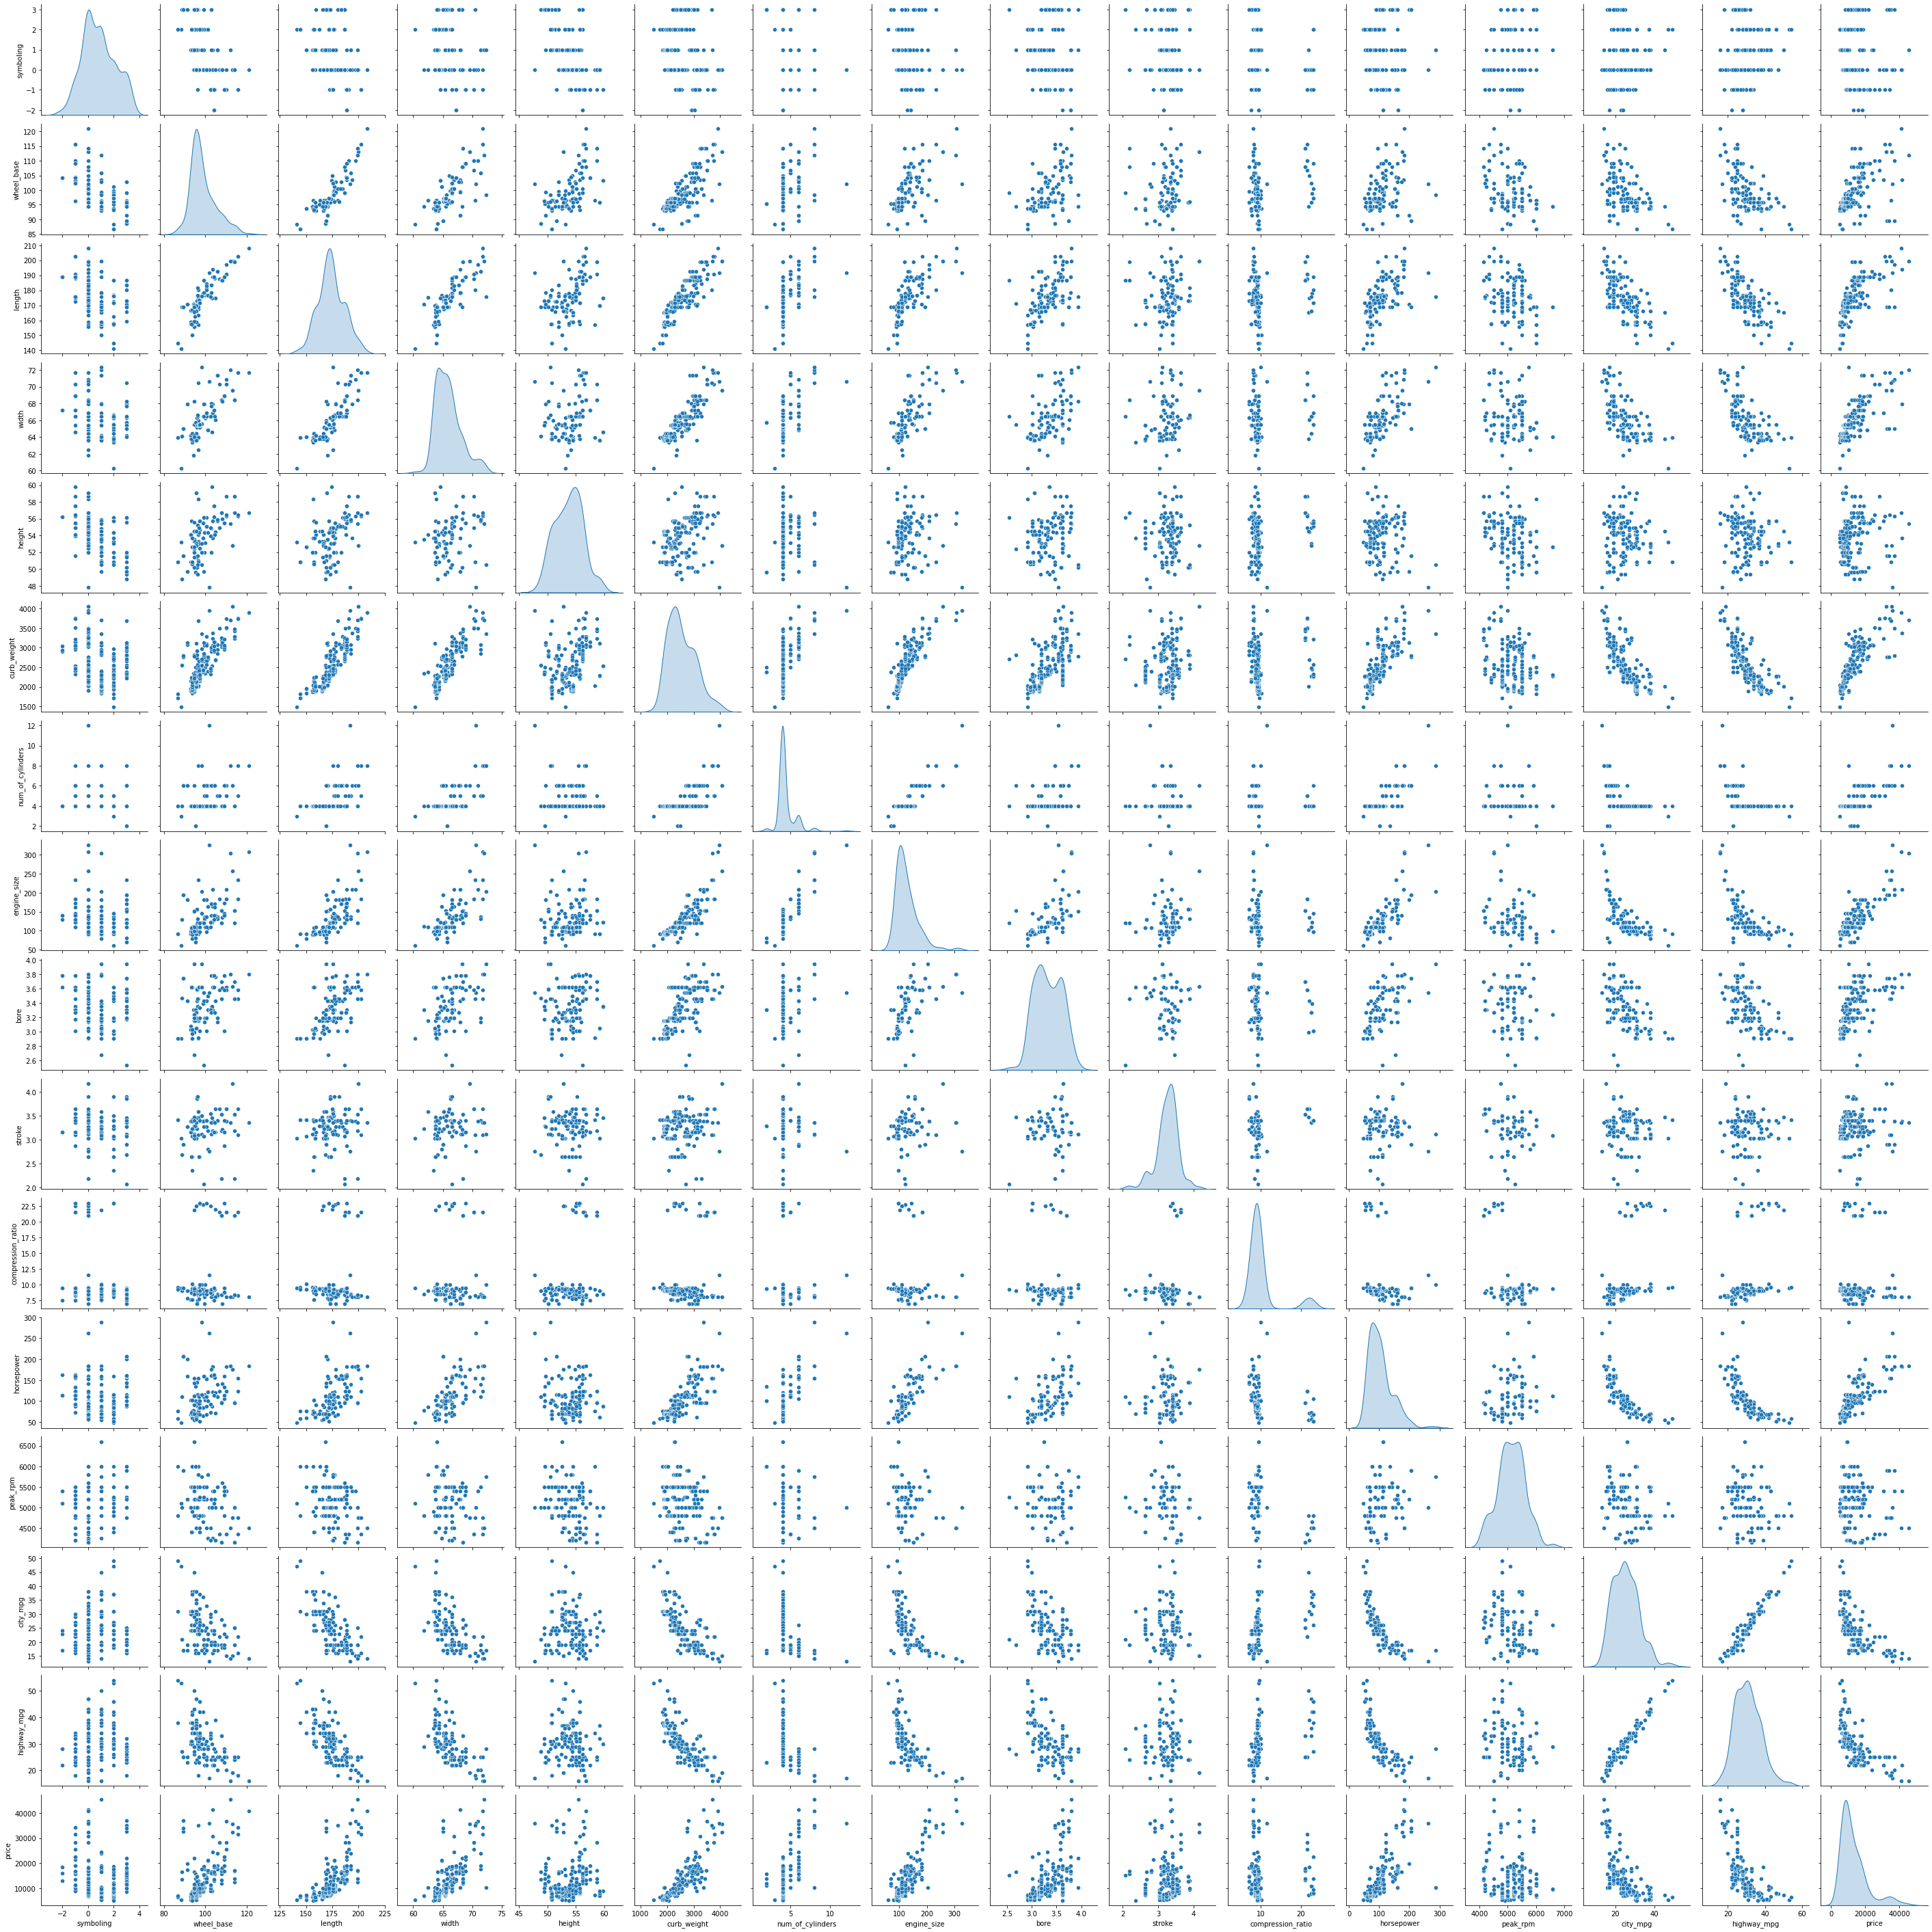

In [ ]:
sns.pairplot(car_df, diag_kind = 'kde') # this gives density distribution in the diagonal. Kernel Density Estimator

In [ ]:
x = car_df.drop('price', axis = 1) # all columns except price

In [ ]:
y = car_df[['price']] #price column. dependent variable

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

1. x_train and y_train is passed to fit method
2. gradient descent is performed in fit method on dataset, to find best fit model
3. BFM identifies the relationship between x and y
4. so model looks like y = m1x1 + m2x2+.......m16x16 + c
5. after the model is built we pass x_test, we get y_pred for each x_test data for the saved m and c coefficients.
6. accuracy is calcuated by ypred - y_test

In [ ]:
lmodel = LinearRegression()
lmodel.fit(x_train, y_train)

LinearRegression()

In [ ]:
for id, col_name in enumerate(x_train.columns):
    print(f"The coefficient for {col_name} is {lmodel.coef_[0][id]}")

The coefficient for symboling is 88.57794900973445
The coefficient for wheel_base is 71.8240276093493
The coefficient for length is -93.38447872012047
The coefficient for width is 479.81643559267985
The coefficient for height is 315.2038400121209
The coefficient for curb_weight is -0.8657326891350785
The coefficient for num_of_cylinders is -3176.1760903729523
The coefficient for engine_size is 251.74362582792048
The coefficient for bore is -6832.550987635404
The coefficient for stroke is -5085.818859790593
The coefficient for compression_ratio is 335.76825192963815
The coefficient for horsepower is -0.03898796131293025
The coefficient for peak_rpm is 2.4300494935823664
The coefficient for city_mpg is -201.81713200346897
The coefficient for highway_mpg is -41.93431935731907


1. The values above does not seem to be correct for all the columns.
2. This error could be because of not handling the outliers.

In [ ]:
intercept = lmodel.intercept_[0]
print(f"The intercept for model is {intercept}")

The intercept for model is -12323.06017456976


In [ ]:
lmodel.score(x_test, y_test)

0.8362176483290364

83.6% od data has been captured by the model and remaining data is residuals.